# Prediction

Separate validation and test images.

In [1]:
import os
import shutil

source_dir = 'original_data/UHN-MedImg3D-ML-quiz/validation'
destination_dir = 'original_data/pancreas_validation'

if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

for subdir in os.listdir(source_dir):
    subdir_path = os.path.join(source_dir, subdir)

    if os.path.isdir(subdir_path):
        for file in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, file)

            if os.path.isfile(file_path):
                shutil.copy(file_path, destination_dir)
                print(f"Copied: {file_path} to {destination_dir}")


Copied: original_data/UHN-MedImg3D-ML-quiz/validation/subtype2/quiz_2_191_0000.nii.gz to original_data/pancreas_validation
Copied: original_data/UHN-MedImg3D-ML-quiz/validation/subtype2/quiz_2_088.nii.gz to original_data/pancreas_validation
Copied: original_data/UHN-MedImg3D-ML-quiz/validation/subtype2/quiz_2_241_0000.nii.gz to original_data/pancreas_validation
Copied: original_data/UHN-MedImg3D-ML-quiz/validation/subtype2/quiz_2_084_0000.nii.gz to original_data/pancreas_validation
Copied: original_data/UHN-MedImg3D-ML-quiz/validation/subtype2/quiz_2_377_0000.nii.gz to original_data/pancreas_validation
Copied: original_data/UHN-MedImg3D-ML-quiz/validation/subtype2/quiz_2_098_0000.nii.gz to original_data/pancreas_validation
Copied: original_data/UHN-MedImg3D-ML-quiz/validation/subtype2/quiz_2_089_0000.nii.gz to original_data/pancreas_validation
Copied: original_data/UHN-MedImg3D-ML-quiz/validation/subtype2/quiz_2_085_0000.nii.gz to original_data/pancreas_validation
Copied: original_data

In [2]:
! cp original_data/UHN-MedImg3D-ML-quiz/test original_data/pancreas_test -r

In [6]:
# import os
# import shutil

# source_dir = 'original_data/pancreas_validation'
# destination_dir = 'original_data/pancreas_validation/images'

# if not os.path.exists(destination_dir):
#     os.makedirs(destination_dir)

# if os.path.isdir(source_dir):
#     for file in os.listdir(source_dir):
#         file_path = os.path.join(source_dir, file)

#         if os.path.isfile(file_path):
#             if file.endswith('_0000.nii.gz'):
#                 shutil.move(file_path, destination_dir)
#                 print(f"Moved: {file_path} to {destination_dir}")

In [7]:
# import os
# import shutil

# source_dir = 'original_data/pancreas_validation'
# destination_dir = 'original_data/pancreas_validation/labels'

# if not os.path.exists(destination_dir):
#     os.makedirs(destination_dir)

# if os.path.isdir(source_dir):
#     for file in os.listdir(source_dir):
#         file_path = os.path.join(source_dir, file)

#         if os.path.isfile(file_path):
#             if not file.endswith('_0000.nii.gz'):
#                 shutil.move(file_path, destination_dir)
#                 print(f"Moved: {file_path} to {destination_dir}")

### Do Prediction

In [1]:
import os

def make_if_dont_exist(folder_path,overwrite=False):
    """
    creates a folder if it does not exists
    input: 
    folder_path : relative path of the folder which needs to be created
    over_write :(default: False) if True overwrite the existing folder 
    """
    if os.path.exists(folder_path):
        
        if not overwrite:
            print(f"{folder_path} exists.")
        else:
            print(f"{folder_path} overwritten")
            shutil.rmtree(folder_path)
            os.makedirs(folder_path)

    else:
      os.makedirs(folder_path)
      print(f"{folder_path} created!")

# Maybe move path of preprocessed data directly on content - this may be signifcantely faster!
print("Current Working Directory {}".format(os.getcwd()))
path_dict = {
    "nnUNet_raw" : os.path.join(os.getcwd(), "nnUNet_raw"), 
    "nnUNet_preprocessed" : os.path.join(os.getcwd(), "nnUNet_preprocessed"), # 1 experiment: 1 epoch took 112s
    "nnUNet_results" : os.path.join(os.getcwd(), "nnUNet_results"),
    "RAW_DATA_PATH" : os.path.join(os.getcwd(), "original_data"), # This is used here only for convenience (not necessary for nnU-Net)!
}

# Write paths to environment variables
for env_var, path in path_dict.items():
  os.environ[env_var] = path 

# Check whether all environment variables are set correct!
for env_var, path in path_dict.items():
  if os.getenv(env_var) != path:
    print("Error:")
    print("Environment Variable {} is not set correctly!".format(env_var))
    print("Should be {}".format(path))
    print("Variable is {}".format(os.getenv(env_var)))
  make_if_dont_exist(path, overwrite=False)

print("If No Error Occured Continue Forward. =)")

Current Working Directory /scratch/alif/nnUNet
/scratch/alif/nnUNet/nnUNet_raw exists.
/scratch/alif/nnUNet/nnUNet_preprocessed exists.
/scratch/alif/nnUNet/nnUNet_results exists.
/scratch/alif/nnUNet/original_data exists.
If No Error Occured Continue Forward. =)


In [2]:
# os.environ['nnUNet_raw_data_base'] = '/scratch/alif/nnUNet/original_data'
os.environ['nnUNet_raw_data_base'] = '/scratch/alif/nnUNet/nnUNet_raw_data_base'
os.environ['nnUNet_preprocessed'] = '/scratch/alif/nnUNet/nnUNet_preprocessed'
os.environ['RESULTS_FOLDER'] = '/scratch/alif/nnUNet/nnUNet_trained_models'

In [10]:
# ! nnUNet_predict -i "original_data/pancreas_validation/images" -o "original_data/pancreas_validation_preds" -d 6 -c 3d_fullres

**Note:** remember to set inference_mode to true in the trainer class.

In [8]:
! nnUNet_predict -i "original_data/pancreas_validation/images" -o "original_data/pancreas_validation_preds" -t 6 -tr nnUNetTrainerV2_Custom -m 3d_fullres --num_threads_preprocessing 24 -f 99



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

using model stored in  /scratch/alif/nnUNet/nnUNet_trained_models/nnUNet/3d_fullres/Task006_PancreasUHN/nnUNetTrainerV2_Custom__nnUNetPlansv2.1
This model expects 1 input modalities for each image
Found 36 unique case ids, here are some examples: ['quiz_2_084' 'quiz_1_158' 'quiz_2_364' 'quiz_2_074' 'quiz_1_242'
 'quiz_1_164' 'quiz_1_335' 'quiz_2_080' 'quiz_1_211' 'quiz_0_254']
If they don't look right, make sure to double check your filenames. They must end with _0000.nii.gz etc
number of cases: 36
number of cases that still need to be predicted: 36
emptying cuda cache
loading parameters for folds, [99]
Number of classification pa

In [ ]:
! nnUNet_predict -i "original_data/pancreas_test" -o "original_data/pancreas_test_preds" -t 6 -tr nnUNetTrainerV2_Custom -m 3d_fullres --num_threads_preprocessing 24 -f 99



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

using model stored in  /scratch/alif/nnUNet/nnUNet_trained_models/nnUNet/3d_fullres/Task006_PancreasUHN/nnUNetTrainerV2_Custom__nnUNetPlansv2.1
This model expects 1 input modalities for each image
Found 72 unique case ids, here are some examples: ['quiz_409' 'quiz_275' 'quiz_101' 'quiz_351' 'quiz_095' 'quiz_373'
 'quiz_524' 'quiz_408' 'quiz_371' 'quiz_351']
If they don't look right, make sure to double check your filenames. They must end with _0000.nii.gz etc
number of cases: 72
number of cases that still need to be predicted: 72
emptying cuda cache
loading parameters for folds, [99]
Number of classification parameters: 19
Number 

### Evaluation

In [21]:
! nnUNet_evaluate_folder -ref "original_data/pancreas_validation/labels"  -pred "original_data/pancreas_validation_preds" -l 0 1 2



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

OrderedDict([('all', [OrderedDict([('0', OrderedDict([('Accuracy', 0.9857614478158246), ('Dice', 0.992386600308044), ('False Discovery Rate', 0.00879458986199666), ('False Negative Rate', 0.006429390984368899), ('False Omission Rate', 0.09413986778666932), ('False Positive Rate', 0.12472104735711387), ('Jaccard', 0.9848882523906819), ('Negative Predictive Value', 0.9058601322133307), ('Precision', 0.9912054101380033), ('Recall', 0.9935706090156311), ('Total Positives Reference', 4418770), ('Total Positives Test', 4429314), ('True Negative Rate', 0.8752789526428861)])), ('1', OrderedDict([('Accuracy', 0.9409264105443577), ('Dice', 

### Visualize Prediction

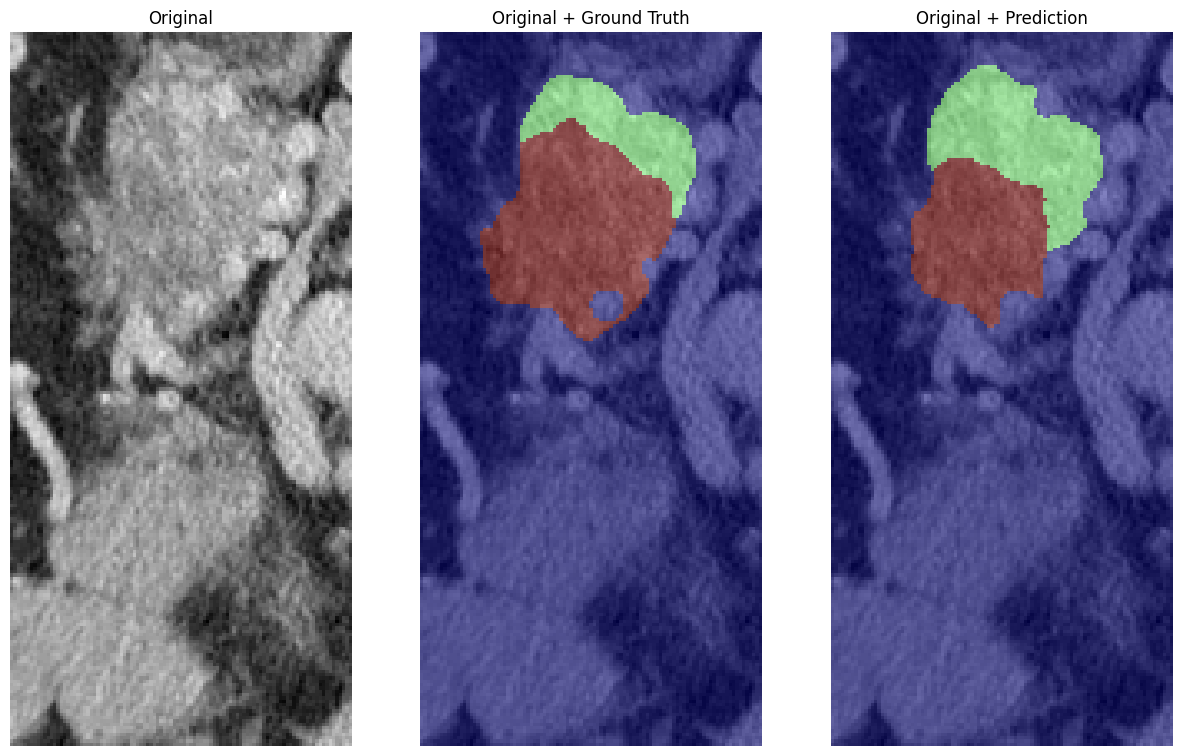

In [20]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def load_nifti_image(file_path):
    """Load a NIfTI image and return the data as a numpy array."""
    nifti_image = nib.load(file_path)
    return nifti_image.get_fdata()

def show_slices(slices, titles=None, cmaps=None):
    """Function to display a row of image slices."""
    fig, axes = plt.subplots(1, len(slices), figsize=(15, 15))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice, cmap=cmaps[i] if cmaps else 'gray')
        if titles:
            axes[i].set_title(titles[i])
        axes[i].axis('off')
    plt.show()

def show_overlay(image, label, prediction, slice_index, alpha=0.5):
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    # Original + Ground Truth
    axes[0].imshow(image[:, :, slice_index], cmap='gray')
    axes[0].imshow(label[:, :, slice_index], cmap='jet', alpha=alpha)
    axes[0].set_title('Original + Ground Truth')
    axes[0].axis('off')

    # Original + Prediction
    axes[1].imshow(image[:, :, slice_index], cmap='gray')
    axes[1].imshow(prediction[:, :, slice_index], cmap='jet', alpha=alpha)
    axes[1].set_title('Original + Prediction')
    axes[1].axis('off')
    
    plt.show()
    
def show_all(original, label, prediction, slice_index, alpha=0.5):
    """Function to display a row of image slices."""
    fig, axes = plt.subplots(1, 3, figsize=(15, 15))

    axes[0].imshow(original[:, :, slice_index], cmap='gray')
    axes[0].set_title('Original')
    axes[0].axis('off')
    
    # Original + Ground Truth
    axes[1].imshow(original[:, :, slice_index], cmap='gray')
    axes[1].imshow(label[:, :, slice_index], cmap='jet', alpha=alpha)
    axes[1].set_title('Original + Ground Truth')
    axes[1].axis('off')

    # Original + Prediction
    axes[2].imshow(original[:, :, slice_index], cmap='gray')
    axes[2].imshow(prediction[:, :, slice_index], cmap='jet', alpha=alpha)
    axes[2].set_title('Original + Prediction')
    axes[2].axis('off')
    
    plt.show()

# Define paths to the original image and prediction files
original_image_path = '/scratch/alif/nnUNet/original_data/pancreas_validation/images/quiz_1_093_0000.nii.gz'  
label_path = '/scratch/alif/nnUNet/original_data/pancreas_validation/labels/quiz_1_093.nii.gz'  
prediction_path = '/scratch/alif/nnUNet/original_data/pancreas_validation_preds/quiz_1_093.nii.gz'

# Load image and prediction
label = load_nifti_image(label_path)
original_image = load_nifti_image(original_image_path)
prediction = load_nifti_image(prediction_path)

# Select a slice to display
slice_index = original_image.shape[2] // 2

# Display the original image, ground truth label, and prediction side by side
# show_slices(
#     [original_image[:, :, slice_index], label[:, :, slice_index], prediction[:, :, slice_index]],
#     titles=['Original Image', 'Ground Truth', 'Prediction'],
#     cmaps=['gray', 'jet', 'jet']
# )

# # Display overlay of original image with ground truth and prediction
# show_overlay(original_image, label, prediction, slice_index)

show_all(original_image, label, prediction, slice_index)
